# 📈 Stochastic Calculus Basics — Ito's Lemma

---

## Ito's Lemma:

Used to find the differential of a function of a stochastic process. If \( X_t \) follows

\[
dX_t = \mu_t dt + \sigma_t dW_t,
\]

and \( f(t, X_t) \) is a twice differentiable function, then

\[
df = \left( \frac{\partial f}{\partial t} + \mu_t \frac{\partial f}{\partial X} + \frac{1}{2} \sigma_t^2 \frac{\partial^2 f}{\partial X^2} \right) dt + \sigma_t \frac{\partial f}{\partial X} dW_t
\]

---

## Importance:

- Foundation for deriving Black-Scholes and other models.
- Accounts for the stochastic nature and nonlinear transformations.

---

## Example:

If \( S_t \) follows GBM:

\[
dS_t = \mu S_t dt + \sigma S_t dW_t,
\]

and \( f(S_t) = \ln S_t \), then

\[
df = \left(\mu - \frac{\sigma^2}{2}\right) dt + \sigma dW_t.
\]



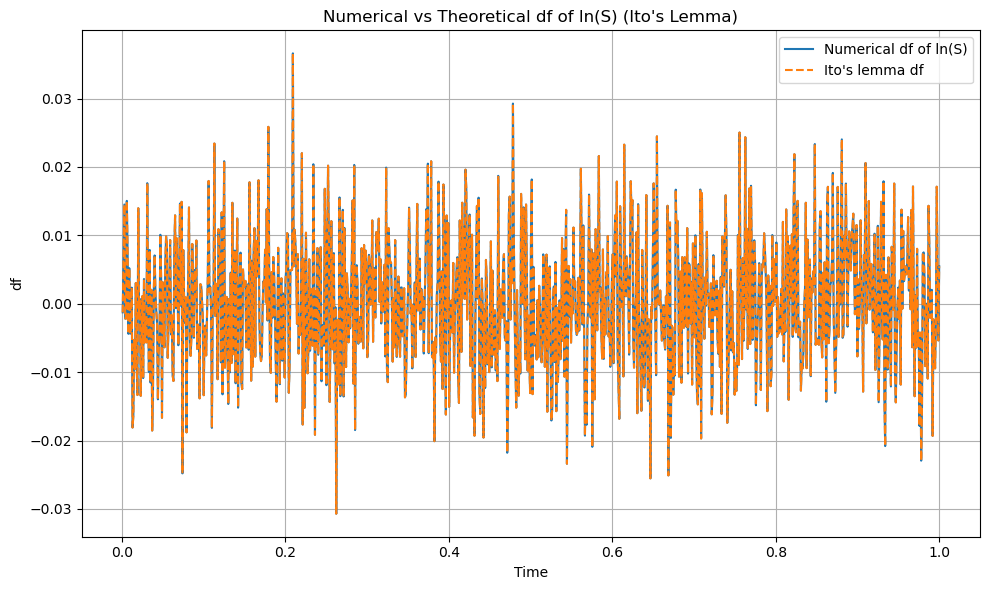

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Parameters
mu = 0.1
sigma = 0.3
S0 = 100
T = 1.0
N = 1000
dt = T / N

# Simulate GBM
W = np.random.normal(scale=np.sqrt(dt), size=N)
W = np.cumsum(W)
t = np.linspace(0, T, N)
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Apply Ito's lemma: f(S) = ln(S)
f = np.log(S)

# Calculate df numerically
df = np.diff(f)
dt_arr = np.diff(t)

# Calculate theoretical df using Ito's lemma
theoretical_df = (mu - 0.5 * sigma**2) * dt_arr + sigma * np.diff(W)

# Plot comparison
plt.figure(figsize=(10,6))
plt.plot(t[1:], df, label='Numerical df of ln(S)')
plt.plot(t[1:], theoretical_df, label="Ito's lemma df", linestyle='--')
plt.xlabel('Time')
plt.ylabel('df')
plt.title("Numerical vs Theoretical df of ln(S) (Ito's Lemma)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
